In [710]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [712]:
# file_path_trainC = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx"
file_path_trainC = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx"
train_cat = pd.read_excel(file_path_trainC)
train_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN


In [714]:
# file_path_trainFCM = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv"
file_path_trainFCM = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv"
train_FCM = pd.read_csv(file_path_trainFCM)
train_FCM.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,...,0.224985,0.397448,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221
1,WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,...,0.217546,-0.014549,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176
2,4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,...,0.342487,-0.021141,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232
3,obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,...,0.103562,-0.178313,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193
4,s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,...,-0.164956,0.007064,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273


In [715]:
# file_path_trainQ = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx"
file_path_trainQ = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx"
train_Quant = pd.read_excel(file_path_trainQ)
train_Quant.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [716]:
# file_path_trainS = file_path_trainQ = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TRAIN/TRAINING_SOLUTIONS.xlsx"
file_path_trainS = file_path_trainQ = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx"
train_Solutions = pd.read_excel(file_path_trainS)
train_Solutions.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [717]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB


In [718]:
train_cat['Barratt_Barratt_P2_Occ'].value_counts()

Barratt_Barratt_P2_Occ
45.0    239
35.0    195
30.0    149
40.0    116
15.0     86
0.0      65
20.0     41
5.0      38
10.0     37
25.0     25
Name: count, dtype: int64

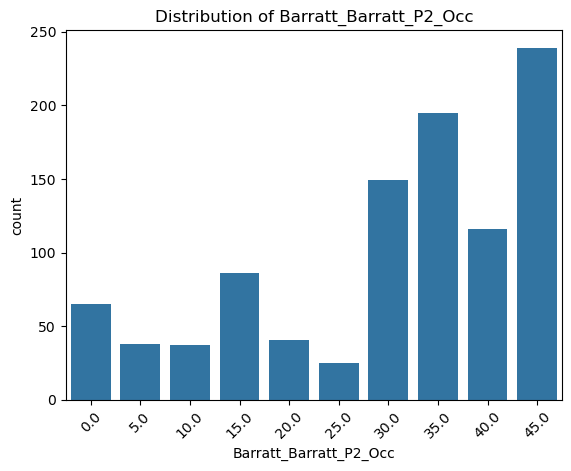

In [719]:
sns.countplot(x='Barratt_Barratt_P2_Occ', data=train_cat[['Barratt_Barratt_P2_Occ']])
plt.title(f"Distribution of Barratt_Barratt_P2_Occ")
plt.xticks(rotation=45)
plt.show()

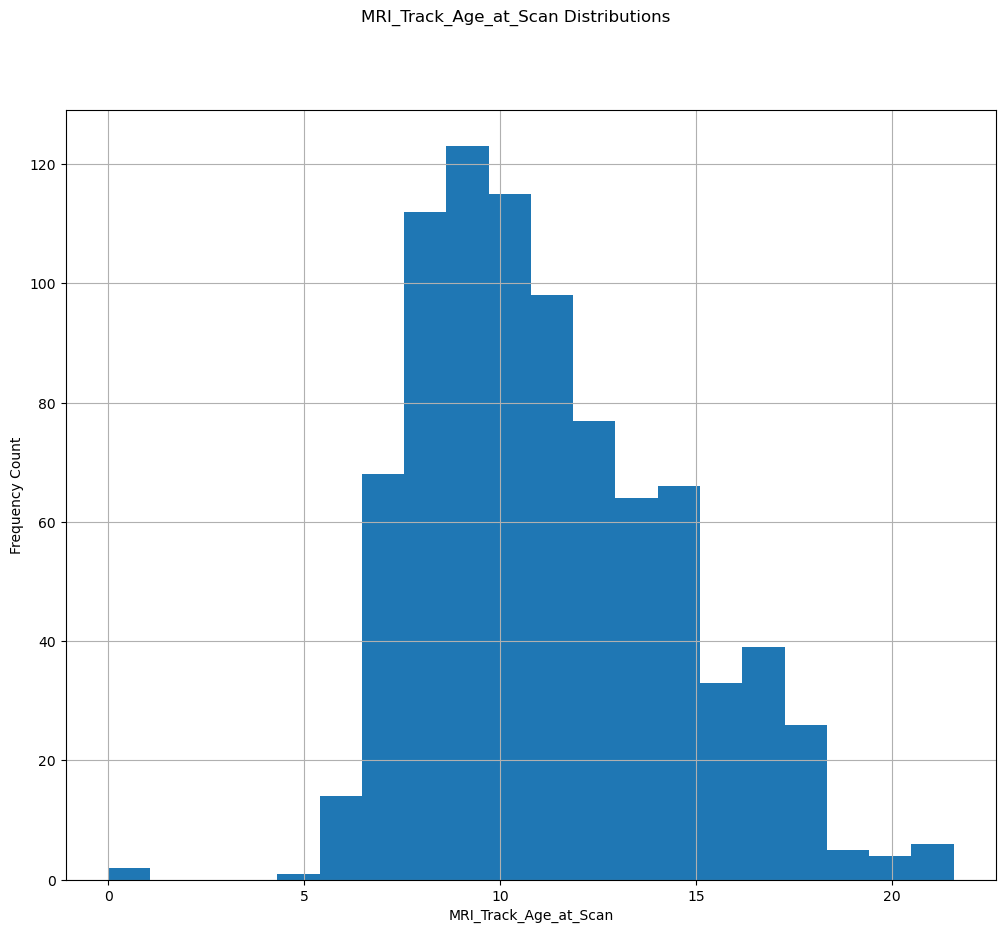

In [720]:
train_Quant['MRI_Track_Age_at_Scan'].hist(figsize=(12,10), bins=20)
plt.suptitle("MRI_Track_Age_at_Scan Distributions")
plt.xlabel('MRI_Track_Age_at_Scan')
plt.ylabel('Frequency Count')
plt.show()

In [721]:
# ADHD distribution
train_Solutions['ADHD_Outcome'].value_counts()

ADHD_Outcome
1    831
0    382
Name: count, dtype: int64

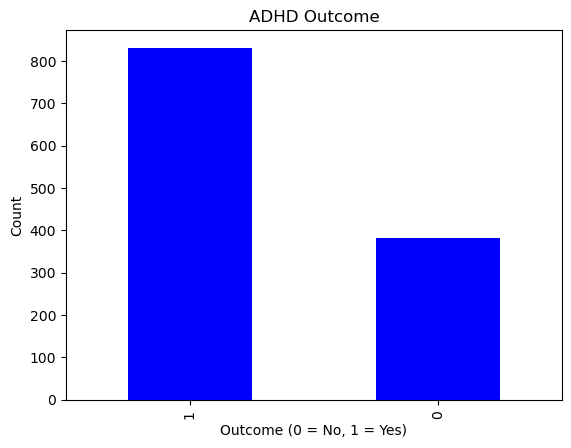

In [722]:
train_Solutions['ADHD_Outcome'].value_counts().plot(kind='bar', color='blue')
plt.title('ADHD Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [723]:
#Gender distribution - address this, could cause bias in modeling, look at during data preparation
train_Solutions['Sex_F'].value_counts()

Sex_F
0    797
1    416
Name: count, dtype: int64

train_Solutions['Sex_F'].value_counts().plot(kind='bar', color='blue')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

Quantatative Data

In [726]:
train_Quant.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

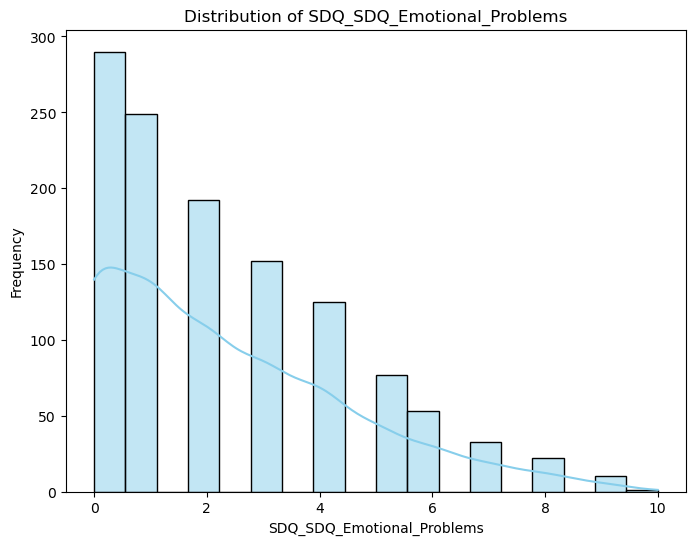

In [727]:
#Plot the distribution of the SDQ_SDQ_Emotional_Problems variable
plt.figure(figsize=(8,6))
sns.histplot(train_Quant['SDQ_SDQ_Emotional_Problems'], kde=True, color = 'skyblue')
plt.title('Distribution of SDQ_SDQ_Emotional_Problems')
plt.xlabel('SDQ_SDQ_Emotional_Problems')
plt.ylabel('Frequency')
plt.show()

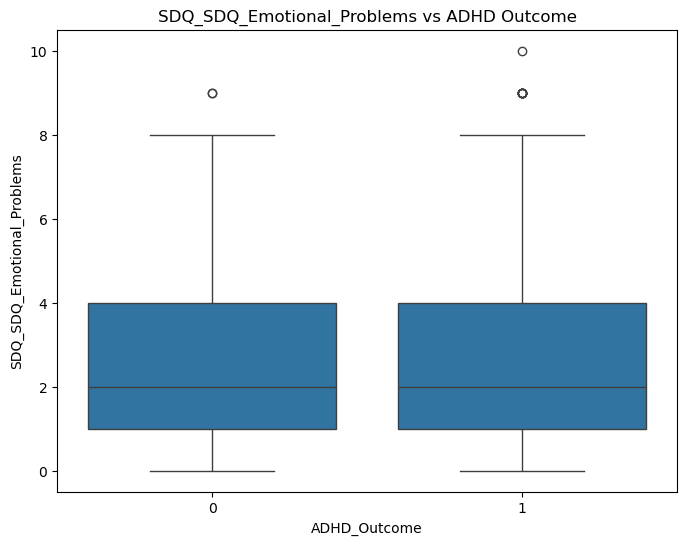

In [728]:
# Check for correlation with ADHD outcome
train_Quant_copy = train_Quant.copy()
train_Quant_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

plt.figure(figsize=(8,6))
sns.boxplot(x='ADHD_Outcome', y = 'SDQ_SDQ_Emotional_Problems', data=train_Quant_copy)
plt.title('SDQ_SDQ_Emotional_Problems vs ADHD Outcome')
plt.xlabel('ADHD_Outcome')
plt.ylabel('SDQ_SDQ_Emotional_Problems')
plt.show()

Categorical Data

In [730]:
train_cat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

'Barratt_Barratt_P1_Edu', indicates the Parent 1 level of education
3=Less than 7th grade\
6=Junior high/Middle school (9th grade)\
9=Partial high school (10th or 11th grade)\
12=High school graduate\
15=Partial college (at least one year)\
18=College education\
21=Graduate degree

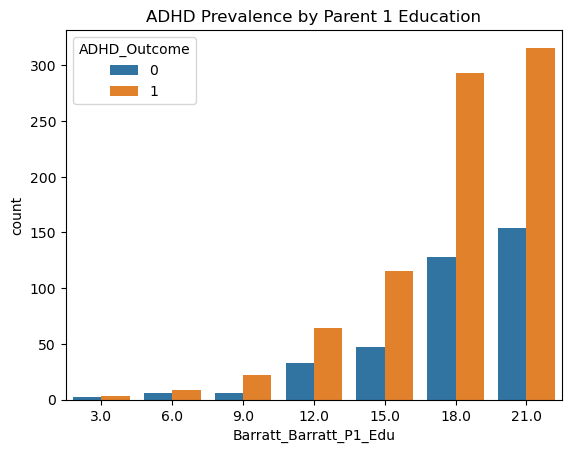

In [732]:
sns.countplot(data=train_cat, x = 'Barratt_Barratt_P1_Edu', hue = train_Solutions['ADHD_Outcome'])
plt.title('ADHD Prevalence by Parent 1 Education')
plt.show()

In [733]:
train_cat['Barratt_Barratt_P1_Edu'].value_counts()

Barratt_Barratt_P1_Edu
21.0    470
18.0    421
15.0    162
12.0     97
9.0      28
6.0      15
3.0       5
Name: count, dtype: int64

In [734]:
# Add ADHD_Outcome directly to a copy of the train_cat dataset for grouping
train_cat_copy = train_cat.copy()
train_cat_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

adhd_percentages = train_cat_copy.groupby('Barratt_Barratt_P1_Edu')['ADHD_Outcome'].mean()
print(adhd_percentages)

Barratt_Barratt_P1_Edu
3.0     0.600000
6.0     0.600000
9.0     0.785714
12.0    0.659794
15.0    0.709877
18.0    0.695962
21.0    0.672340
Name: ADHD_Outcome, dtype: float64


**Pre-Processing**

In [736]:
# Set up for one hot encoding
for col in train_cat.select_dtypes(include='int').columns:
    train_cat[col] = train_cat[col].astype('category')

In [742]:
# Creating a list of all of the columns except the first
columns_to_encode = train_cat.columns[1:].tolist()

# Print the columns to encode
print("Columns to encode:", columns_to_encode)

Columns to encode: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


In [748]:
# encoding categorical data
train_encoded = pd.get_dummies(train_cat[columns_to_encode], drop_first=True)
train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_71275/2479499898.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [749]:
print(train_cat.columns)

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')


In [750]:
columns_to_encode

['Basic_Demos_Enroll_Year',
 'Basic_Demos_Study_Site',
 'PreInt_Demos_Fam_Child_Ethnicity',
 'PreInt_Demos_Fam_Child_Race',
 'MRI_Track_Scan_Location',
 'Barratt_Barratt_P1_Edu',
 'Barratt_Barratt_P1_Occ',
 'Barratt_Barratt_P2_Edu',
 'Barratt_Barratt_P2_Occ']


KeyError: "['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ'] 

In [752]:
# Combine encoded columns with the rest of the DataFrame
cat_train_final = pd.concat([train_cat.drop(columns=columns_to_encode), train_encoded], axis=1)

# ensure it looks correct
cat_train_final.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4
0,00aIpNTbG5uh,1.0,0.0,3.0,21.0,45.0,NaN,NaN,0,0,0,1,0,0,0,1
1,00fV0OyyoLfw,0.0,9.0,2.0,21.0,0.0,21.0,45.0,0,1,0,0,0,0,0,0
2,04X1eiS79T4B,1.0,2.0,2.0,9.0,0.0,NaN,NaN,0,1,0,0,0,0,0,0
3,05ocQutkURd6,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,0,1,0,0,0,0,0
4,06YUNBA9ZRLq,0.0,1.0,2.0,12.0,0.0,NaN,NaN,0,0,1,0,0,0,0,0


**Train and Test Dataframes**

In [754]:
# load in test categorical dataframe

file_path_testC = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TEST/TEST_CATEGORICAL.xlsx"
test_cat = pd.read_excel(file_path_testC)
test_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [755]:
# convert our int variables to categories
for col in test_cat.select_dtypes(include='int').columns:
    test_cat[col] = test_cat[col].astype('category')

# Encode categorical variables in test
test_encoded = pd.get_dummies(test_cat[columns_to_encode], drop_first=True)
test_encoded = test_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Ensure test_encoded has the same columns as train_encoded
missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0  # Add missing columns with 0 values

# Ensure test_encoded columns are in the same order as train_encoded
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

# Combine encoded columns with the rest of the DataFrame
cat_test_final = pd.concat([test_cat.drop(columns=columns_to_encode), test_encoded], axis=1)

cat_test_final.head()

/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_71275/2044556609.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_encoded = test_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4
0,Cfwaf5FX7jWK,0.0,0.0,0,21.0,30.0,18.0,30.0,0,0,0,0,0,0,0,0
1,vhGrzmvA3Hjq,0.0,0.0,0,21.0,45.0,NaN,30.0,0,0,0,0,0,0,0,0
2,ULliyEXjy4OV,0.0,0.0,0,21.0,40.0,18.0,40.0,0,0,0,0,0,0,0,0
3,LZfeAb1xMtql,0.0,0.0,0,21.0,45.0,21.0,45.0,0,0,0,0,0,0,0,0
4,EnFOUv0YK1RG,2.0,0.0,0,18.0,0.0,21.0,45.0,0,0,0,0,0,0,0,0


**Merging Data Frames**

In [760]:
train_cat_FCM = pd.merge(cat_train_final, train_FCM, on = 'participant_id')

In [761]:
train_df = pd.merge(train_cat_FCM, train_Quant, on = 'participant_id')

train_df.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,1.0,0.0,3.0,21.0,45.0,NaN,NaN,0,0,...,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,0.0,9.0,2.0,21.0,0.0,21.0,45.0,0,1,...,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,1.0,2.0,2.0,9.0,0.0,NaN,NaN,0,1,...,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,0,...,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.0,1.0,2.0,12.0,0.0,NaN,NaN,0,0,...,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


**Merge test dataframes**

In [764]:
file_path_testFCM = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv"
test_FCM = pd.read_csv(file_path_testFCM)

file_path_testQ = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TEST/TEST_QUANTITATIVE_METADATA.xlsx"
test_Quant = pd.read_excel(file_path_testQ)

test_cat_FCM = pd.merge(cat_test_final, test_FCM, on = 'participant_id')

test_df = pd.merge(test_cat_FCM, test_Quant, on = 'participant_id')

# ensure it looks accurate
test_df.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,0.0,0.0,0,21.0,30.0,18.0,30.0,0,0,...,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,0.0,0.0,0,21.0,45.0,NaN,30.0,0,0,...,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,0.0,0.0,0,21.0,40.0,18.0,40.0,0,0,...,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,0.0,0.0,0,21.0,45.0,21.0,45.0,0,0,...,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,2.0,0.0,0,18.0,0.0,21.0,45.0,0,0,...,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


In [765]:
len(test_df.columns)

19934

## NA Values

- Consider different ways to fill in null values, besides just using the mean
- I am going to attempt to build a KNN model that predicts null values
1. Fill missing values temporarily so KNN can work.
2. Standardize/normalize continuous features.
3. Train KNN model on data with no missing values.
4. Impute missing values using KNN.
5. Evaluate and fine-tune the model.
6. Reapply imputed values to the original dataset.
7. Check for remaining missing values.

First, we will check to see how many null values we have, sorted by most to least.

In [775]:
# check how many NA values we have
print(train_df.isna().sum().sort_values(ascending=False))

MRI_Track_Age_at_Scan               360
Barratt_Barratt_P2_Occ              222
Barratt_Barratt_P2_Edu              198
PreInt_Demos_Fam_Child_Race          54
PreInt_Demos_Fam_Child_Ethnicity     43
                                   ... 
36throw_134thcolumn                   0
36throw_133thcolumn                   0
36throw_132thcolumn                   0
36throw_131thcolumn                   0
58throw_121thcolumn                   0
Length: 19934, dtype: int64


From this, we can see that the columns, MRI_Track_Age_at_Scan, Barratt_Barratt_P2_Occ, and Barratt_Barratt_P2 Edu have the most null values. Next, we will check to see which of the columns correlate most with our labels (sex and ADHD)

In [777]:
# corr_df = train_df.merge(train_Solutions, on = 'participant_id')
# corr_matrix = corr_df.drop('participant_id', axis=1).corr()
# top_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))\
#                             .stack()\
#                             .sort_values(ascending=False)
# print(top_corr)

In [778]:
cols_with_null = train_df.columns[train_df.isna().any()]
len(cols_with_null)

25

In [779]:
corr_df = corr_matrix[cols_with_null]

In [780]:
corr_df.head()

,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
PreInt_Demos_Fam_Child_Ethnicity,1.000000,0.347621,-0.059821,-0.151631,-0.071257,-0.170385,-0.172485,-0.013564,0.031756,0.025207,...,0.021134,0.025475,0.028328,-0.003650,0.014427,-0.020743,0.051469,0.056993,0.047233,0.021263
PreInt_Demos_Fam_Child_Race,0.347621,1.000000,0.037278,-0.040573,-0.059814,-0.080915,-0.056446,-0.037751,-0.018730,0.080683,...,-0.009259,-0.006729,-0.001397,-0.022854,-0.015936,-0.026971,0.014278,0.025378,0.036501,0.067621
MRI_Track_Scan_Location,-0.059821,0.037278,1.000000,0.170834,0.061553,0.178037,0.141151,0.037695,0.031196,-0.066889,...,-0.064943,-0.052507,-0.092600,0.021500,0.037577,0.078602,-0.122708,-0.110206,-0.011616,-0.004967
Barratt_Barratt_P1_Edu,-0.151631,-0.040573,0.170834,1.000000,0.391740,0.366556,0.272463,0.058907,0.011693,-0.061348,...,-0.056986,-0.105335,-0.083812,-0.049843,-0.013985,-0.032280,-0.136717,-0.142870,0.034975,-0.051131
Barratt_Barratt_P1_Occ,-0.071257,-0.059814,0.061553,0.391740,1.000000,0.093194,0.054059,0.043687,-0.001132,-0.071751,...,-0.034678,-0.040305,-0.069579,-0.002450,-0.024018,0.021433,-0.072128,-0.048974,0.043143,0.014106


In [781]:
# largest_value_a = corr_df.drop('PreInt_Demos_Fam_Child_Ethnicity')['PreInt_Demos_Fam_Child_Ethnicity'].max()
# largest_value_a
list_can_predict = []
for col in cols_with_null:
    largest_value = corr_df.drop(col)[col].max()
    smallest_value = corr_df.drop(col)[col].min()
    if largest_value > 0.5:
        print(col, largest_value)
        prediction_pair = (str(corr_df[corr_df[col] == largest_value].index[0]), col)
        print(prediction_pair)
        list_can_predict.append(prediction_pair)
        print('')
    elif smallest_value < -0.5:
        print(col, smallest_value)
        prediction_pair = (str(corr_df[corr_df[col] == smallest_value].index[0]), col)
        print(prediction_pair)
        list_can_predict.append(prediction_pair)
        print('')

MRI_Track_Scan_Location -0.6029508181435435
('Basic_Demos_Enroll_Year_2016', 'MRI_Track_Scan_Location')

Barratt_Barratt_P2_Edu 0.556523658384038
('Barratt_Barratt_P2_Occ', 'Barratt_Barratt_P2_Edu')

Barratt_Barratt_P2_Occ 0.556523658384038
('Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ')

APQ_P_APQ_P_INV 0.5634624027018682
('APQ_P_APQ_P_PP', 'APQ_P_APQ_P_INV')

APQ_P_APQ_P_PM 0.5695162275906511
('MRI_Track_Age_at_Scan', 'APQ_P_APQ_P_PM')

APQ_P_APQ_P_PP 0.5634624027018682
('APQ_P_APQ_P_INV', 'APQ_P_APQ_P_PP')

SDQ_SDQ_Conduct_Problems 0.7942472498319892
('SDQ_SDQ_Externalizing', 'SDQ_SDQ_Conduct_Problems')

SDQ_SDQ_Difficulties_Total 0.8769288389024463
('SDQ_SDQ_Externalizing', 'SDQ_SDQ_Difficulties_Total')

SDQ_SDQ_Emotional_Problems 0.8318512282680854
('SDQ_SDQ_Internalizing', 'SDQ_SDQ_Emotional_Problems')

SDQ_SDQ_Externalizing 0.8990330623789716
('SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Externalizing')

SDQ_SDQ_Generating_Impact 0.7126223524536951
('SDQ_SDQ_Difficulties_Total', 'SDQ_

From this information, we can see that some columns correlate heavily with each other, so we can build a simple linear regression model to predict the null values. We will make a function that does this.

In [783]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [787]:
def linear_regression_for_nulls(feature_col, label_col):
    # Accessing all rows where label_col is null, will predict with this data
    rows_with_null_label = train_df[train_df[label_col].isna()]
    # rows_with_null_test = test_df[test_df[label_col].isna()]
    
    # Creating training dataset to predict null values

    # Dataframe without null values in label column
    train_label_df = train_df[~train_df.index.isin(rows_with_null_label.index)].drop('participant_id', axis=1)

    # Fill in other null columns with mean
    target_column = label_col

    # Calculate the mean of the column 'feature_col' (ignores NaN values automatically)
    mean_value = train_df[feature_col].mean()
    
    # Fill NaN values in 'feature_col' with the mean
    train_label_df[feature_col] = train_label_df[feature_col].fillna(mean_value)
    rows_with_null_label[feature_col] = rows_with_null_label[feature_col].fillna(mean_value)
    # rows_with_null_test[feature_col] = rows_with_null_test[feature_col].fillna(mean_value)

    # Prepare the data (X is feature column, y is label column)
    X = train_label_df[[feature_col]]  # Feature columns (make sure it's a 2D array)
    y = train_label_df[label_col]      # Label column
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Train the model using the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    new_vals = model.predict(rows_with_null_label[[feature_col]])
    # new_vals_test = model.predict(rows_with_null_test[[feature_col]])
    # return (new_vals, new_vals_test)
    return new_vals

In [789]:
# linear_regression_for_nulls('Basic_Demos_Enroll_Year_2016', 'MRI_Track_Scan_Location')

In [790]:
train_df.isna().sum().sum()

1115

In [791]:
print(len(list_can_predict))

15


In [792]:
# for pair in list_can_predict:
#     new_vals = linear_regression_for_nulls(pair[0], pair[1])
#     train_df.loc[train_df[pair[1]].isna(), pair[1]] = new_vals
#     print(train_df.isna().sum().sum())
for pair in list_can_predict:
    # Get the predicted values using your function
    new_vals = linear_regression_for_nulls(pair[0], pair[1])
    # new_vals = result[0]
    # new_vals_test = result[1]
    train_df.loc[train_df[pair[1]].isna(), pair[1]] = new_vals
    # test_df.loc[test_df[pair[1]].isna(), pair[1]] = new_vals_test
    
    # Print the number of remaining NaN values after updating
    print(train_df.isna().sum().sum())

/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_71275/490833609.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_null_label[feature_col] = rows_with_null_label[feature_col].fillna(mean_value)
/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_71275/490833609.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_null_label[feature_col] = rows_with_null_label[feature_col].fillna(mean_value)
/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_71275/490833609.py:

1112
914
692


/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_71275/490833609.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_null_label[feature_col] = rows_with_null_label[feature_col].fillna(mean_value)
/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_71275/490833609.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_null_label[feature_col] = rows_with_null_label[feature_col].fillna(mean_value)
/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_71275/490833609.py:

680
668
656


/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_71275/490833609.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_null_label[feature_col] = rows_with_null_label[feature_col].fillna(mean_value)
/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_71275/490833609.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_null_label[feature_col] = rows_with_null_label[feature_col].fillna(mean_value)
/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_71275/490833609.py:

647
638
629


/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_71275/490833609.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_null_label[feature_col] = rows_with_null_label[feature_col].fillna(mean_value)
/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_71275/490833609.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_null_label[feature_col] = rows_with_null_label[feature_col].fillna(mean_value)
/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_71275/490833609.py:

620
611
602
593
584
224


/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_71275/490833609.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_null_label[feature_col] = rows_with_null_label[feature_col].fillna(mean_value)
/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_71275/490833609.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_null_label[feature_col] = rows_with_null_label[feature_col].fillna(mean_value)
/var/folders/xs/50kmp8g92x99q2dxvv031c980000gn/T/ipykernel_71275/490833609.py:

In [813]:
train_df.isna().sum().sum()

224

In [815]:
# remember to do the same for the testing data!

In [817]:
train_df.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,1.0,0.0,3.0,21.0,45.0,16.86762,30.582819,0,0,...,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,0.0,9.0,2.0,21.0,0.0,21.00000,45.000000,0,1,...,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,15.262711
2,04X1eiS79T4B,1.0,2.0,2.0,9.0,0.0,16.86762,30.582819,0,1,...,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,3.0,8.0,2.0,18.0,10.0,18.00000,0.000000,0,0,...,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.0,1.0,2.0,12.0,0.0,16.86762,30.582819,0,0,...,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [123]:
# Fill Null Values
train_df.loc[train_df['MRI_Track_Age_at_Scan'].isna(), 'MRI_Track_Age_at_Scan'] = new_MRITAS_vals
train_df.isna().sum()

participant_id                      0
PreInt_Demos_Fam_Child_Ethnicity    0
Basic_Demos_Enroll_Year_2016        0
Basic_Demos_Enroll_Year_2017        0
Basic_Demos_Enroll_Year_2018        0
                                   ..
SDQ_SDQ_Hyperactivity               0
SDQ_SDQ_Internalizing               0
SDQ_SDQ_Peer_Problems               0
SDQ_SDQ_Prosocial                   0
MRI_Track_Age_at_Scan               0
Length: 19973, dtype: int64

In [128]:
test_df.isna().sum()

participant_id                       0
PreInt_Demos_Fam_Child_Ethnicity     0
Basic_Demos_Enroll_Year_2016         0
Basic_Demos_Enroll_Year_2017         0
Basic_Demos_Enroll_Year_2018         0
                                    ..
SDQ_SDQ_Hyperactivity               30
SDQ_SDQ_Internalizing               30
SDQ_SDQ_Peer_Problems               30
SDQ_SDQ_Prosocial                   30
MRI_Track_Age_at_Scan                0
Length: 19973, dtype: int64

371 NaN values\
360 in MRI_Track_Age_at_Scan\
11 in PreInt_Demos_Fam_Child_Ethnicity

In [131]:
# fill NA values using the mean
train_df.fillna({'MRI_Track_Age_at_Scan':train_df['MRI_Track_Age_at_Scan'].mean()}, inplace = True)
train_df.fillna({'PreInt_Demos_Fam_Child_Ethnicity':train_df['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace = True)

print(train_df.isna().sum().sum())

0


In [133]:
# Using backward and foward fills (indicates using previous or the following data row in order to replace the missing values)
# I think this shouldn't do anything because above shows that there are no more null values
train_df.ffill(inplace = True)
print(train_df.isna().sum().sum())

0


In [145]:
# Fill NAs of test data

for col in test_df.columns:
    if test_df[col].isna().sum() > 0:  # Check if the column has NaN values
        if test_df[col].dtype in ['float64', 'int64']:  # Ensure it's numeric
            test_df[col] = test_df[col].fillna(test_df[col].mean())  # Avoid inplace
        else:
            print(f"Skipping non-numeric column: {col}")

In [147]:
test_df.isna().sum().sum()

0

In [151]:
train_df.to_csv('/Users/mayapatel/UCLA_WiDs_Team-21/train-edited2.csv', index=False)
test_df.to_csv('/Users/mayapatel/UCLA_WiDs_Team-21/test-edited2.csv', index=False)

Note to self: REMEMBER TO DO THE SAME TO TEST DATA!

## Machine Learning

In [79]:
file_path_trainS = "/Users/mayapatel/UCLA_WiDs_Team-21/data/TRAIN/TRAINING_SOLUTIONS.xlsx"
train_Solutions = pd.read_excel(file_path_trainS)

In [80]:
X_train = train_df.drop(columns = ['participant_id'])
Y_train = train_Solutions.drop(columns = ['participant_id'])

In [81]:
Y_train.head()

,ADHD_Outcome,Sex_F
0,1,1
1,1,0
2,1,0
3,1,1
4,1,1


In [82]:
# Step 1: Ensure that 'adhd' and 'sex' are in the Y_train DataFrame
Y_train = train_Solutions[['ADHD_Outcome', 'Sex_F']]  # Assuming 'adhd' and 'sex' are in train_Solutions

# Step 2: Calculate correlations between each feature in X_train and the target columns in Y_train
correlations = {}

for target_column in Y_train.columns:  # Loop over each target column ('adhd' and 'sex')
    corr_with_target = X_train.corrwith(Y_train[target_column])  # Calculate correlation with target column
    correlations[target_column] = corr_with_target  # Store the correlations for each target

# Step 3: Combine the results into a single DataFrame
correlations_df = pd.DataFrame(correlations)

# Step 4: Sort the correlations for both columns ('adhd' and 'sex') and find the top 20 features
# Combine both columns into a single list and get the top 20 correlated features
top_20_features = pd.concat([correlations_df['ADHD_Outcome'], correlations_df['Sex_F']], axis=1)

# Sort by the absolute correlation value and pick top 20
top_20_features = top_20_features.abs().mean(axis=1).sort_values(ascending=False).head(20)

# Print top 20 correlated features
print(top_20_features)

SDQ_SDQ_Hyperactivity           0.348755
SDQ_SDQ_Externalizing           0.317150
SDQ_SDQ_Difficulties_Total      0.255673
SDQ_SDQ_Generating_Impact       0.217470
SDQ_SDQ_Conduct_Problems        0.164142
SDQ_SDQ_Internalizing           0.156994
SDQ_SDQ_Emotional_Problems      0.156751
SDQ_SDQ_Prosocial               0.139272
SDQ_SDQ_Peer_Problems           0.119535
APQ_P_APQ_P_OPD                 0.106073
Basic_Demos_Enroll_Year_2016    0.100397
0throw_103thcolumn              0.099023
MRI_Track_Scan_Location_1       0.097615
164throw_189thcolumn            0.096994
164throw_173thcolumn            0.088341
152throw_156thcolumn            0.086939
74throw_77thcolumn              0.086213
74throw_189thcolumn             0.086008
31throw_66thcolumn              0.085709
158throw_191thcolumn            0.083851
dtype: float64


In [83]:
correlations_df.head()

,ADHD_Outcome,Sex_F
PreInt_Demos_Fam_Child_Ethnicity,0.032662,-0.007363
Basic_Demos_Enroll_Year_2016,-0.169820,0.030975
Basic_Demos_Enroll_Year_2017,-0.043665,0.020874
Basic_Demos_Enroll_Year_2018,0.103601,-0.001189
Basic_Demos_Enroll_Year_2019,0.070068,-0.047682


**XGBOOST**

In [85]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

# Initialize the base classifier
xgb_classifier = XGBClassifier(objective='binary:logistic', n_estimators = 100, learning_rate = 0.1, max_depth = 5)

In [86]:
# Wrap with MultiOutputClassifier for multi-target classification
multioutput_classifier = MultiOutputClassifier(xgb_classifier)

In [87]:
# Train the model
# It takes 6min and 45.8s to run
multioutput_classifier.fit(X_train, Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

**Testing the Model**

In [89]:
participant_id = test_df['participant_id']

X_test = test_df.drop(columns = 'participant_id')

y_pred = multioutput_classifier.predict(X_test)

In [90]:
# Get the columns of the training and test data
train_columns = X_train.columns
test_columns = X_test.columns

# Find columns that are in the training data but not in the test data (missing columns)
missing_cols = set(train_columns) - set(test_columns)
print("Missing columns in the test data:", missing_cols)

# Find columns that are in the test data but not in the training data (extra columns)
extra_cols = set(test_columns) - set(train_columns)
print("Extra columns in the test data:", extra_cols)


Missing columns in the test data: set()
Extra columns in the test data: set()


Creating a dataframe of the participant IDs that we stored and our predicted values - This is what we submit on Kaggle

In [92]:
# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(
    y_pred,
    columns=['Predicted_Gender', 'Predicted_ADHD']
)

# Combine participant IDs with predictions
result_df = pd.concat([participant_id.reset_index(drop=True), predictions_df], axis=1)

# Print or save the DataFrame
print(result_df)

    participant_id  Predicted_Gender  Predicted_ADHD
0     Cfwaf5FX7jWK                 0               0
1     vhGrzmvA3Hjq                 1               0
2     ULliyEXjy4OV                 1               0
3     LZfeAb1xMtql                 0               0
4     EnFOUv0YK1RG                 1               0
..             ...               ...             ...
299   UadZfjdEg7eG                 0               0
300   IUEHiLmQAqCi                 1               1
301   cRySmCadYFRO                 0               0
302   E3MvDUtJadc5                 0               0
303   dQJXfyRazknD                 1               0

[304 rows x 3 columns]


**Evaluating Model** Using cross validation

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

In [95]:
def multi_output_accuracy(y_true, y_pred):
    # Ensure y_true and y_pred are NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Compute accuracy for each target variable and return the mean
    return np.mean([accuracy_score(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])

In [96]:
# Create a scorer using scikit-learn's make_scorer
multi_output_scorer = make_scorer(multi_output_accuracy)

In [97]:
#Note: it takes 12 min to run this cell!
# Perform cross-validation on the training data
cv_scores = cross_val_score(multioutput_classifier, X_train, Y_train, cv=5, scoring=multi_output_scorer)

# Output the cross-validation results
print("Cross-validation scores for each fold:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

# Cross-validation scores for each fold: [0.82304527 0.78600823 0.69341564 0.64669421 0.33471074]
# Mean CV score: 0.6567748188960311

Cross-validation scores for each fold: [0.82098765 0.7962963  0.69341564 0.64669421 0.33471074]
Mean CV score: 0.6584209094310105


Feature Engineering Notes:
* could improve accuracy
* domain knowledge (take a look at ADHD info resources on kaggle page)
* Normalization
* Feature scaling
* Dimensionality reduction (less features)
* Feature aggregation
* Feature selection (reduce dimensionality)



**Logistic Regression for Feature Selection**

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
model = LogisticRegression(max_iter=1000)
model.fit(train_df.drop(columns='participant_id'), train_Solutions['Sex_F'])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [102]:
# Get coefficients for Sex prediction
coefficients = pd.Series(model.coef_[0], index=train_df.drop(columns='participant_id').columns)

In [103]:
# Select top features for Sex prediction
top_features = coefficients.abs().nlargest(10)
print(top_features)

50throw_53thcolumn           0.448604
52throw_53thcolumn           0.432634
114throw_121thcolumn         0.427062
101throw_131thcolumn         0.426405
164throw_189thcolumn         0.425007
121throw_147thcolumn         0.423198
53throw_55thcolumn           0.415745
MRI_Track_Scan_Location_4    0.403198
160throw_190thcolumn         0.401027
89throw_91thcolumn           0.399822
dtype: float64


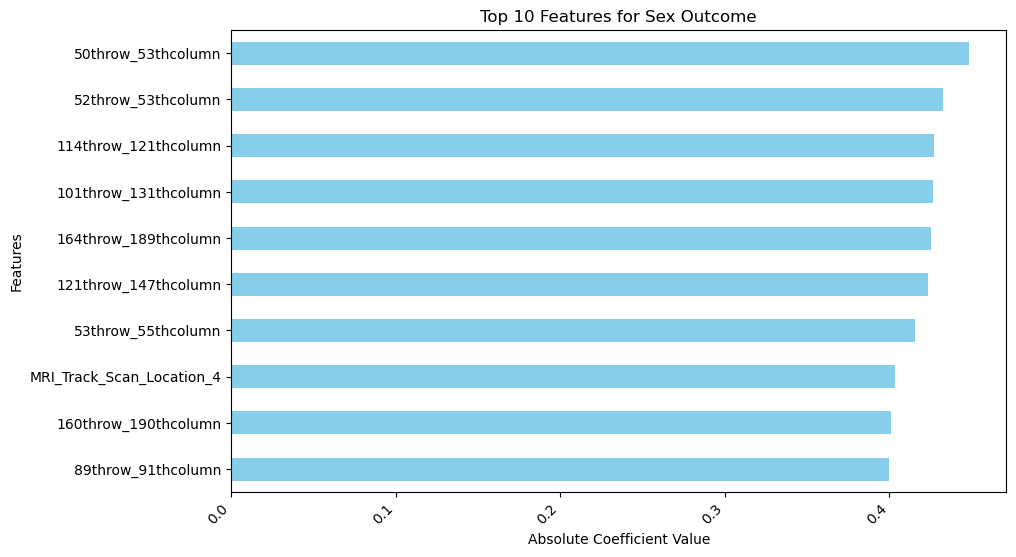

In [104]:
#Plotting the top 10 coefficents for Sex Outcome
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Features for Sex Outcome')
plt.ylabel('Features')
plt.xlabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()

In [105]:
model = LogisticRegression(max_iter=1000)
model.fit(train_df.drop(columns='participant_id'), train_Solutions['ADHD_Outcome'])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [106]:
# Get coefficients for ADHD_Outcome prediction
coefficients = pd.Series(model.coef_[0], index=train_df.drop(columns='participant_id').columns)

In [107]:
# Select top features for ADHD_Outcome prediction
top_features = coefficients.abs().nlargest(10)
print(top_features)

Basic_Demos_Enroll_Year_2016    0.820910
Barratt_Barratt_P1_Occ_25       0.495897
SDQ_SDQ_Hyperactivity           0.474830
Basic_Demos_Enroll_Year_2018    0.472849
Basic_Demos_Enroll_Year_2017    0.471808
MRI_Track_Scan_Location_3       0.434048
8throw_96thcolumn               0.413294
Barratt_Barratt_P1_Occ_35       0.407349
MRI_Track_Scan_Location_1       0.390112
0throw_6thcolumn                0.372952
dtype: float64


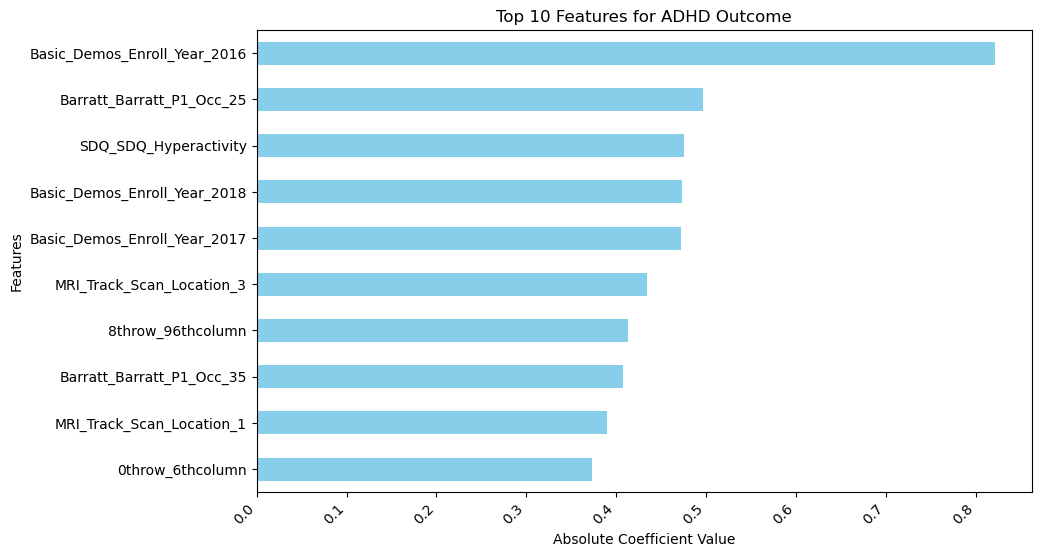

In [108]:
#Plotting the top 10 coefficents
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Features for ADHD Outcome')
plt.ylabel('Features')
plt.xlabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()

**Using L1 Regularization** Sex prediction

In [110]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(train_df.drop(columns='participant_id'), train_Solutions['Sex_F'])

LogisticRegression(penalty='l1', solver='liblinear')

In [111]:
selected_features_Sex = train_df.drop(columns='participant_id').columns[model.coef_[0] != 0]
print(selected_features_Sex)

Index(['PreInt_Demos_Fam_Child_Ethnicity', 'Basic_Demos_Enroll_Year_2017',
       'Basic_Demos_Enroll_Year_2019', 'Basic_Demos_Study_Site_3',
       'Basic_Demos_Study_Site_4', 'PreInt_Demos_Fam_Child_Race_1',
       'PreInt_Demos_Fam_Child_Race_2', 'PreInt_Demos_Fam_Child_Race_9',
       'MRI_Track_Scan_Location_1', 'MRI_Track_Scan_Location_3',
       ...
       'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM',
       'APQ_P_APQ_P_PP', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan'],
      dtype='object', length=407)


**Using L1 Regularization** ADHD prediction

In [113]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(train_df.drop(columns='participant_id'), train_Solutions['ADHD_Outcome'])

LogisticRegression(penalty='l1', solver='liblinear')

In [114]:
selected_features_ADHD = train_df.drop(columns='participant_id').columns[model.coef_[0] != 0]
print(selected_features_ADHD)

Index(['PreInt_Demos_Fam_Child_Ethnicity', 'Basic_Demos_Enroll_Year_2016',
       'Basic_Demos_Enroll_Year_2017', 'Basic_Demos_Study_Site_3',
       'Basic_Demos_Study_Site_4', 'PreInt_Demos_Fam_Child_Race_1',
       'PreInt_Demos_Fam_Child_Race_8', 'MRI_Track_Scan_Location_1',
       'MRI_Track_Scan_Location_3', 'MRI_Track_Scan_Location_4',
       ...
       'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems',
       'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems',
       'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact',
       'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object', length=266)


**Row Selection and Reduction to Improve the Model**

In [116]:
# Step 1: Find common features between ADHD and Sex selected features
common_features = list(set(selected_features_ADHD) & set(selected_features_Sex))
print('PreInt_Demos_Fam_Child_Ethnicity' in common_features)

True


In [117]:
top_20_features_list = top_20_features.index.tolist()

# Step 2: Check if each of the top 20 features is in the common_features list
for feature in top_20_features_list:
    if feature in common_features:
        print(f"{feature} is in common_features")
    else:
        print(f"{feature} is NOT in common_features")

SDQ_SDQ_Hyperactivity is in common_features
SDQ_SDQ_Externalizing is in common_features
SDQ_SDQ_Difficulties_Total is NOT in common_features
SDQ_SDQ_Generating_Impact is in common_features
SDQ_SDQ_Conduct_Problems is NOT in common_features
SDQ_SDQ_Internalizing is NOT in common_features
SDQ_SDQ_Emotional_Problems is in common_features
SDQ_SDQ_Prosocial is in common_features
SDQ_SDQ_Peer_Problems is NOT in common_features
APQ_P_APQ_P_OPD is in common_features
Basic_Demos_Enroll_Year_2016 is NOT in common_features
0throw_103thcolumn is NOT in common_features
MRI_Track_Scan_Location_1 is in common_features
164throw_189thcolumn is NOT in common_features
164throw_173thcolumn is NOT in common_features
152throw_156thcolumn is NOT in common_features
74throw_77thcolumn is NOT in common_features
74throw_189thcolumn is NOT in common_features
31throw_66thcolumn is NOT in common_features
158throw_191thcolumn is NOT in common_features


In [118]:
X_train_2 = X_train[common_features]
X_test_2 = X_test[common_features]

**Fit and Transform Model**

In [120]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

# Initialize the base classifier
xgb_classifier = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=5)

In [121]:
# Wrap with MultiOutputClassifier for multi-target classification
multioutput_classifier = MultiOutputClassifier(xgb_classifier)

In [122]:
# Train the model
multioutput_classifier.fit(X_train_2, Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

In [123]:
y_pred_2 = multioutput_classifier.predict(X_test_2)

In [124]:
# Convert predictions to a DataFrame
predictions_df_2 = pd.DataFrame(
    y_pred_2,
    columns=['Predicted_Gender', 'Predicted_ADHD']
)

# Combine participant IDs with predictions
result_df_2 = pd.concat([participant_id.reset_index(drop=True), predictions_df_2], axis=1)

result_df_2.head()

,participant_id,Predicted_Gender,Predicted_ADHD
0,Cfwaf5FX7jWK,1,0
1,vhGrzmvA3Hjq,1,0
2,ULliyEXjy4OV,1,0
3,LZfeAb1xMtql,1,0
4,EnFOUv0YK1RG,1,0


**Evaluate the Model Using Cross Validation**

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

In [127]:
# Create a scorer using scikit-learn's make_scorer
multi_output_scorer = make_scorer(multi_output_accuracy)

In [128]:
# Perform cross-validation on the training data
cv_scores_2 = cross_val_score(multioutput_classifier, X_train_2, Y_train, cv=5, scoring=multi_output_scorer, n_jobs=-1)

# Output the cross-validation results
print("Cross-validation scores for each fold:", cv_scores_2)
print("Mean CV score:", np.mean(cv_scores_2))

#Cross-validation scores for each fold: [0.78395062 0.76954733 0.70987654 0.66735537 0.43181818]
#Mean CV score: 0.6725096078631433

Cross-validation scores for each fold: [0.78806584 0.74897119 0.68106996 0.64669421 0.45247934]
Mean CV score: 0.6634561099207563


**Using correlated features**

In [130]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

# Initialize the base classifier
xgb_classifier = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=5)

In [131]:
# Wrap with MultiOutputClassifier for multi-target classification
multioutput_classifier = MultiOutputClassifier(xgb_classifier)

In [132]:
X_train_3 = X_train[top_20_features_list]
X_test_3 = X_test[top_20_features_list]

In [133]:
# Train the model
multioutput_classifier.fit(X_train_3, Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

In [134]:
y_pred_3 = multioutput_classifier.predict(X_test_3)

In [135]:
# Convert predictions to a DataFrame
predictions_df_3 = pd.DataFrame(
    y_pred_3,
    columns=['Predicted_Gender', 'Predicted_ADHD']
)

# Combine participant IDs with predictions
result_df_3 = pd.concat([participant_id.reset_index(drop=True), predictions_df_3], axis=1)

result_df_3.head()

,participant_id,Predicted_Gender,Predicted_ADHD
0,Cfwaf5FX7jWK,1,0
1,vhGrzmvA3Hjq,1,1
2,ULliyEXjy4OV,1,1
3,LZfeAb1xMtql,1,0
4,EnFOUv0YK1RG,1,0


In [136]:
# Create a scorer using scikit-learn's make_scorer
multi_output_scorer = make_scorer(multi_output_accuracy)

In [137]:
# Perform cross-validation on the training data
cv_scores_3 = cross_val_score(multioutput_classifier, X_train_3, Y_train, cv=5, scoring=multi_output_scorer, n_jobs=-1)

# Output the cross-validation results
print("Cross-validation scores for each fold:", cv_scores_3)
print("Mean CV score:", np.mean(cv_scores_3))

Cross-validation scores for each fold: [0.78600823 0.79423868 0.71604938 0.64049587 0.4731405 ]
Mean CV score: 0.6819865319865319


**Using BOTH correlated features and feature importance**

In [139]:
# Assuming common_features and top_20_features_list are already defined

# Convert both lists to sets and take the union (unique values from both)
merged_features = list(set(top_20_features_list) | set(common_features))

# Alternatively, you can use set().union() method:
# merged_features = list(set(top_20_features_list).union(common_features))

# Print the merged list
len(merged_features)


57

In [140]:
# Initialize the base classifier
xgb_classifier = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=5)

In [141]:
# Wrap with MultiOutputClassifier for multi-target classification
multioutput_classifier = MultiOutputClassifier(xgb_classifier)

In [142]:
X_train_4 = X_train[merged_features]
X_test_4 = X_test[merged_features]

In [143]:
multioutput_classifier.fit(X_train_4, Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

In [144]:
y_pred_4 = multioutput_classifier.predict(X_test_4)

In [145]:
# Convert predictions to a DataFrame
predictions_df_4 = pd.DataFrame(
    y_pred_4,
    columns=['Predicted_Gender', 'Predicted_ADHD']
)

# Combine participant IDs with predictions
result_df_4 = pd.concat([participant_id.reset_index(drop=True), predictions_df_4], axis=1)

result_df_4.head()

,participant_id,Predicted_Gender,Predicted_ADHD
0,Cfwaf5FX7jWK,1,0
1,vhGrzmvA3Hjq,1,0
2,ULliyEXjy4OV,1,0
3,LZfeAb1xMtql,1,0
4,EnFOUv0YK1RG,1,0


In [146]:
# Create a scorer using scikit-learn's make_scorer
multi_output_scorer = make_scorer(multi_output_accuracy)

In [147]:
# Perform cross-validation on the training data
cv_scores_4 = cross_val_score(multioutput_classifier, X_train_4, Y_train, cv=5, scoring=multi_output_scorer, n_jobs=-1)

# Output the cross-validation results
print("Cross-validation scores for each fold:", cv_scores_4)
print("Mean CV score:", np.mean(cv_scores_4))

Cross-validation scores for each fold: [0.82304527 0.78600823 0.75308642 0.69008264 0.48553719]
Mean CV score: 0.7075519504812434


In [148]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score

# Create the custom scorer for F1 score (you can use 'macro', 'micro', or 'weighted')
f1_scorer = make_scorer(f1_score, average='weighted')  # You can change 'weighted' to 'macro' or 'micro'

# Perform cross-validation on the training data
cv_scores_4 = cross_val_score(multioutput_classifier, X_train_4, Y_train, cv=5, scoring=f1_scorer, n_jobs=-1)

# Output the cross-validation results
print("Cross-validation F1 scores for each fold:", cv_scores_4)
print("Mean CV F1 score:", np.mean(cv_scores_4))


Cross-validation F1 scores for each fold: [0.81598728 0.81119383 0.77297579 0.62401074 0.42424242]
Mean CV F1 score: 0.6896820119358055


In [268]:
import os
print(os.getcwd())

/Users/mayapatel/UCLA_WiDs_Team-21


In [270]:
result_df_4.shape

(304, 3)

In [272]:
result_df_4.to_csv('/Users/mayapatel/UCLA_WiDs_Team-21/results1.csv', index=False)